In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('intern_car_class.csv')
df.head()

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı,satıldı
0,0,10500,AZN,Bakı,Honda,CR-V,2000,Offroader / SUV,Yaşıl,2.0 L/147 a.g./Benzin,258 200 km,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1064,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",NaN,NaN,Digər,NaN,NaN,satılmadı
1,0,15900,AZN,Bakı,Kia,Rio,2012,Sedan,Qəhvəyi,1.4 L/107 a.g./Benzin,246 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,953,"ABS, Yağış sensoru, Mərkəzi qapanma, Kondision...","Salon maşınıdı! Motor, korobka, elektronika ə...",2,Rəsmi diler,4,NaN,satılmadı
2,1,72900,AZN,Bakı,Volkswagen,Passat,2022,Sedan,Qara,1.4 L/218 a.g./Plug-in Hibrid,0 km,Robotlaşdırılmış,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",17.05.2023,30568,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",2 il daxili zamanət - GTE mode - PLUG-İN - Rəq...,1,NaN,5,NaN,satılmadı
3,0,20900,USD,Bakı,Mercedes,S 500,2012,Sedan,Qara,4.7 L/435 a.g./Benzin,160 000 km,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,166,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Salam aleykum Mersedes S 500 long ideal Veziyy...,NaN,Avropa,5,NaN,satılmadı
4,0,13800,AZN,Bakı,Honda,Civic,2007,Sedan,Ağ,1.3 L/95 a.g./Hibrid,200 000 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,1727,"Yüngül lehimli disklər, Kondisioner, Dəri salon",Avtomobil 5 aydir ki gelib. Cox seliqeli ve ba...,2,NaN,5,NaN,satılmadı


In [3]:
df.isnull().sum()

Avtosalon                      0
Qiymet                         0
Valyuta                        0
Şəhər                          0
Marka                          0
Model                          0
Buraxılış ili                  0
Ban növü                       0
Rəng                           0
Mühərrik                       0
Yürüş                          0
Sürətlər qutusu                0
Ötürücü                        0
Yeni                           0
Vəziyyəti                     29
Yeniləndi                      0
Baxışların sayı                0
Extra                        769
Etrafli                      277
Sahiblər                    3827
Hansı bazar üçün yığılıb    3316
Yerlərin sayı               3172
Qəzalı                      9965
satıldı                        0
dtype: int64

In [4]:
new_names = {"Avtosalon":"car_dealership","Qiymet":"price","Valyuta":"currency","Şəhər":"city","Marka":"brand","Model":"model",
             "Buraxılış ili":"release_date",
            "Ban növü":"type_of_ban","Rəng":"color","Mühərrik":"engine","Yürüş":"distance","Sürətlər qutusu":"gearbox",
            "Ötürücü":"gear","Yeni":"is_new","Vəziyyəti":"condition","Yeniləndi":"refreshed","Baxışların sayı":"views",
            "Extra":"extra","Etrafli":"detailed","Sahiblər":"owners","Hansı bazar üçün yığılıb":"market","Yerlərin sayı":"seats",
            "Qəzalı":"car_accident","satıldı":"sold"}

In [5]:
df=df.rename(columns=new_names)

In [6]:
df.columns

Index(['car_dealership', 'price', 'currency', 'city', 'brand', 'model',
       'release_date', 'type_of_ban', 'color', 'engine', 'distance', 'gearbox',
       'gear', 'is_new', 'condition', 'refreshed', 'views', 'extra',
       'detailed', 'owners', 'market', 'seats', 'car_accident', 'sold'],
      dtype='object')

<Axes: >

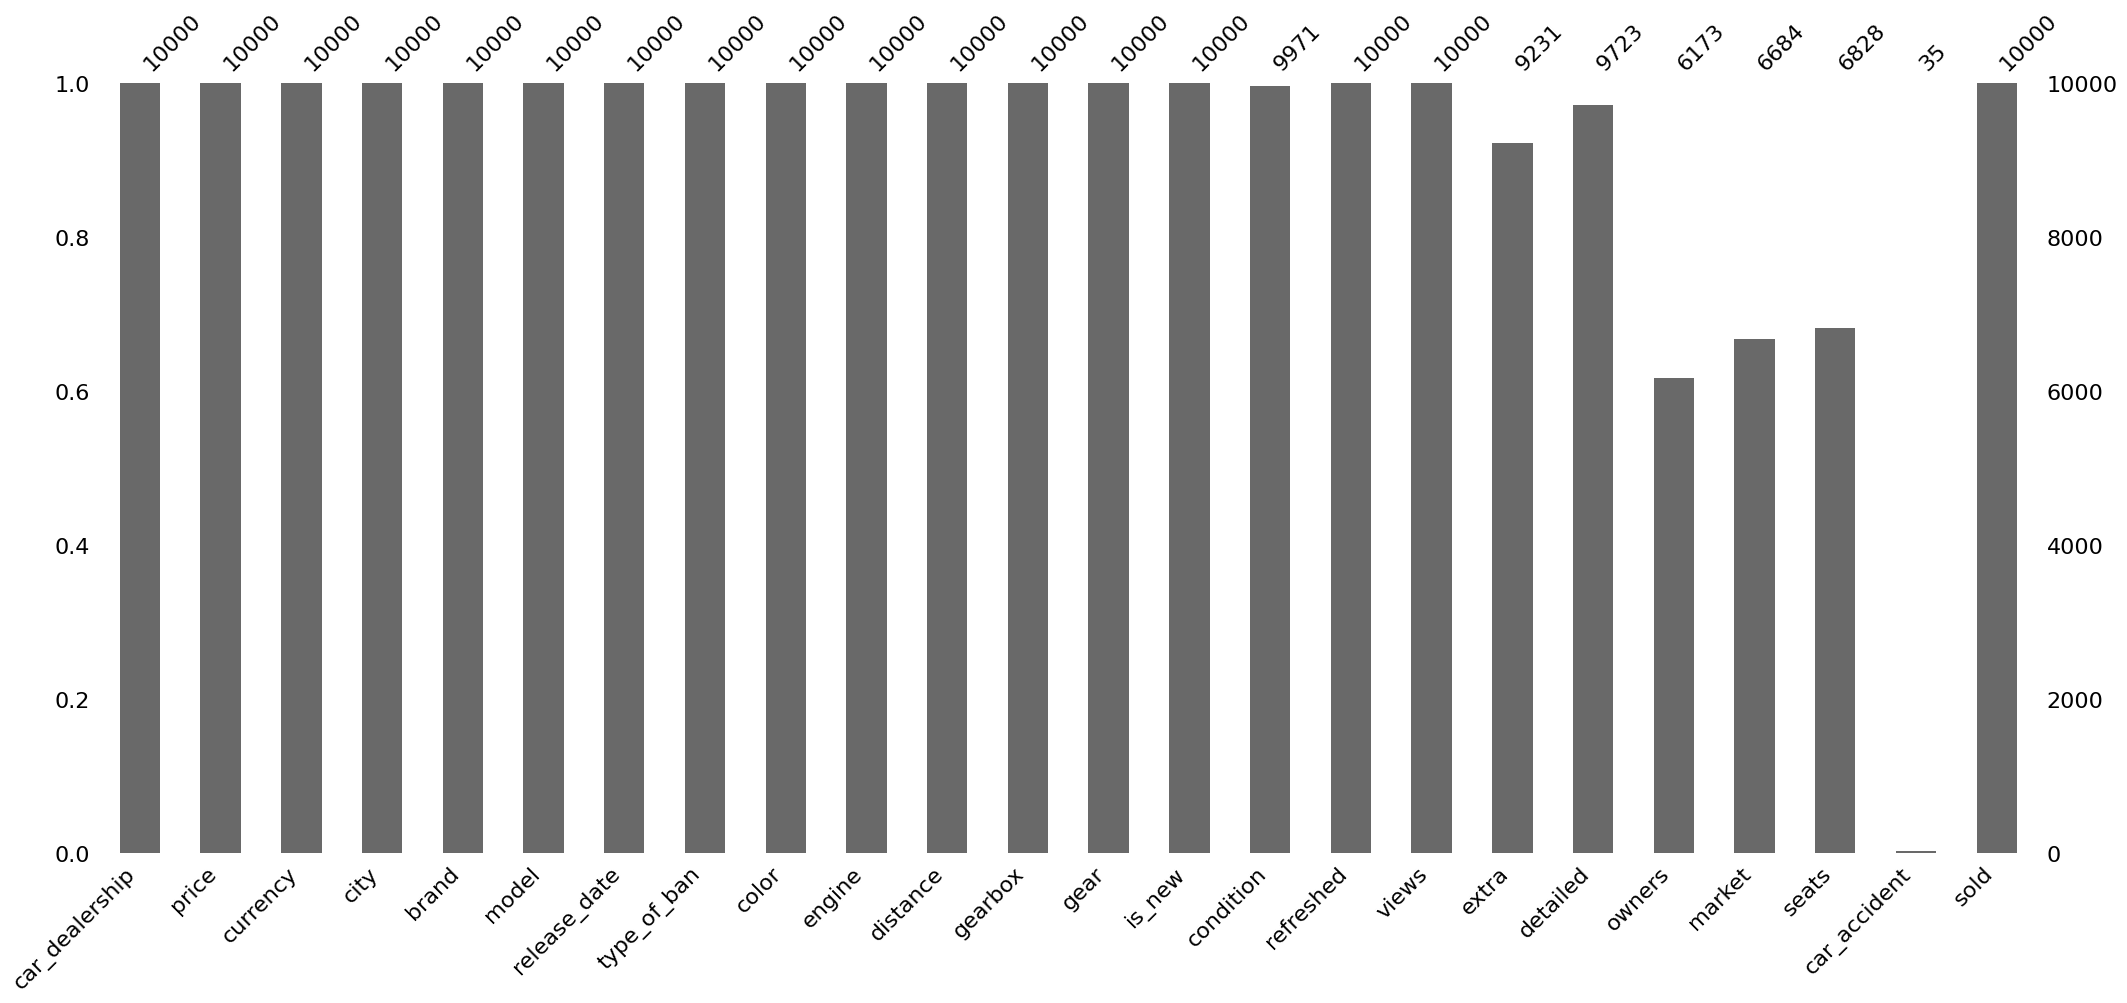

In [7]:
import missingno as msno
msno.bar(df)

## Visualization

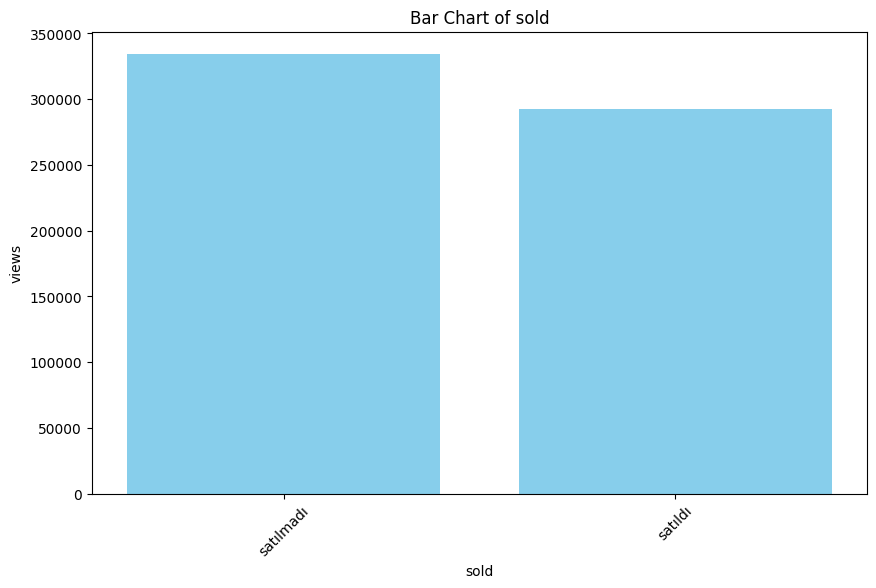

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['sold'], df['views'], color='skyblue')
plt.xlabel('sold')
plt.ylabel('views')
plt.title('Bar Chart of sold')
plt.xticks(rotation=45)
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_13616\4139768618.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sold'] = df['sold'].replace({'satıldı':1, 'satılmadı':0})


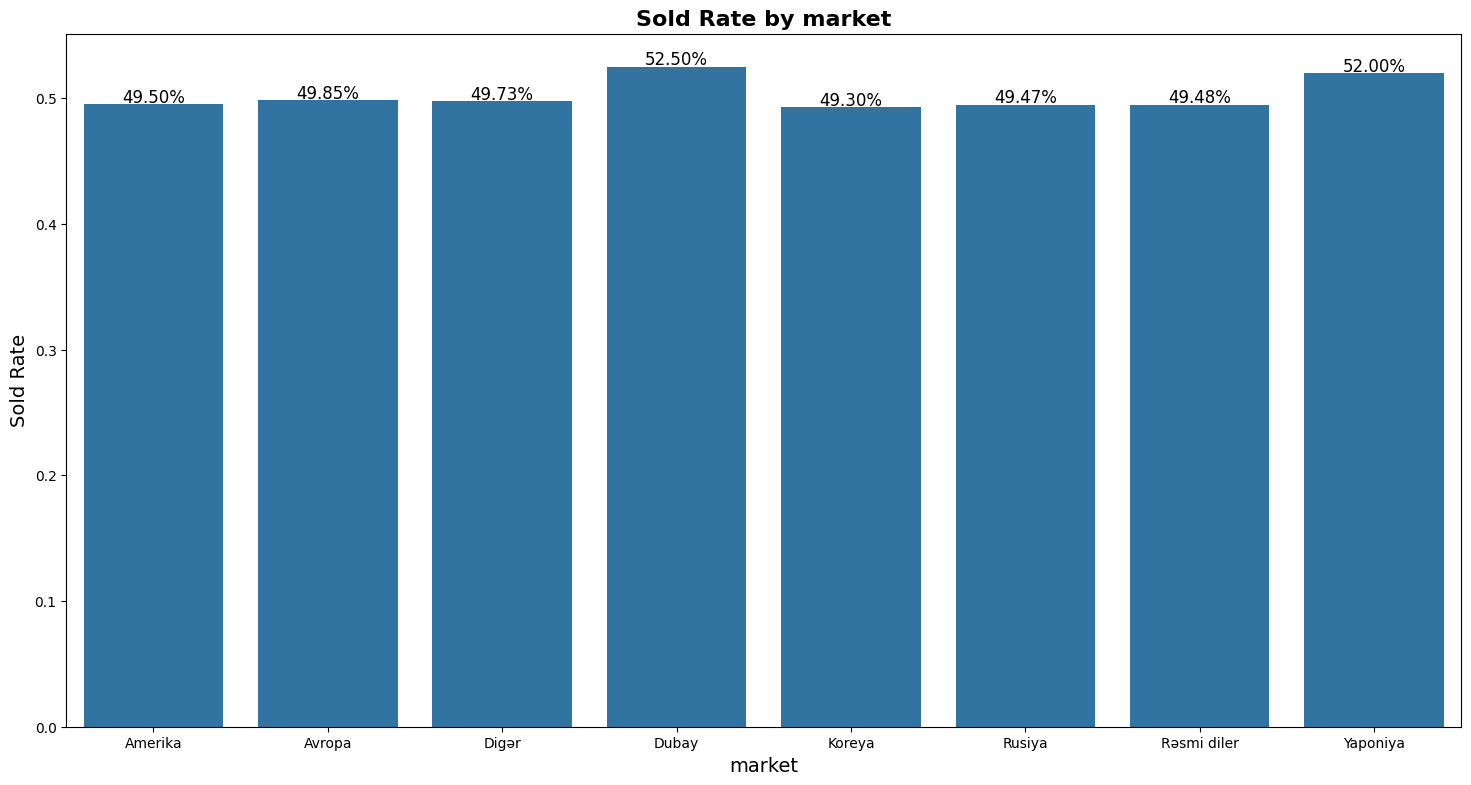

In [9]:
df['sold'] = df['sold'].replace({'satıldı':1, 'satılmadı':0})
car_groupby= df.groupby('market')['sold'].mean().reset_index()
plt.figure(figsize=(18,9))
plots = sns.barplot(x='market', y='sold', data=car_groupby)
for p in plots.patches:
    plots.annotate('{:.2f}%'.format(p.get_height() * 100),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')
plt.xlabel("market", size=14)
plt.ylabel("Sold Rate", size=14)
plt.title("Sold Rate by market", size=16, weight='semibold')
plt.show()


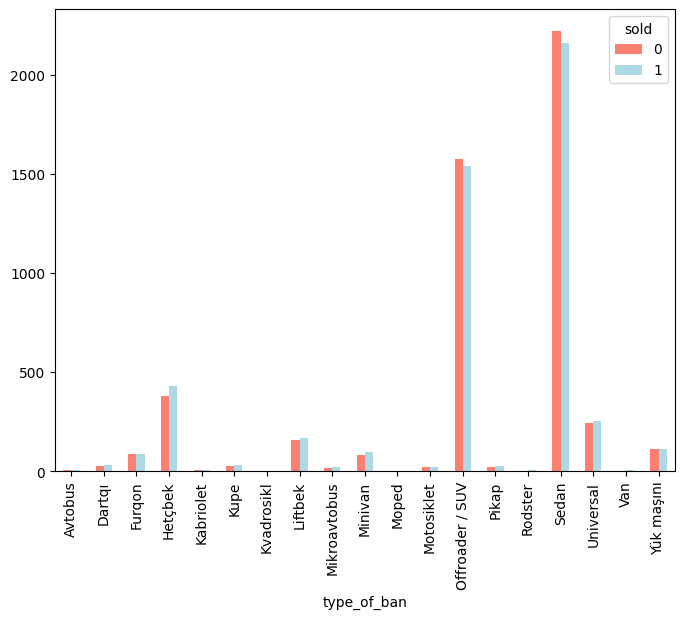

In [10]:
pd.crosstab(df['type_of_ban'], df['sold']).plot(kind="bar",
                                    figsize=(8,6),
                                    color=["salmon", "lightblue"])
plt.show()

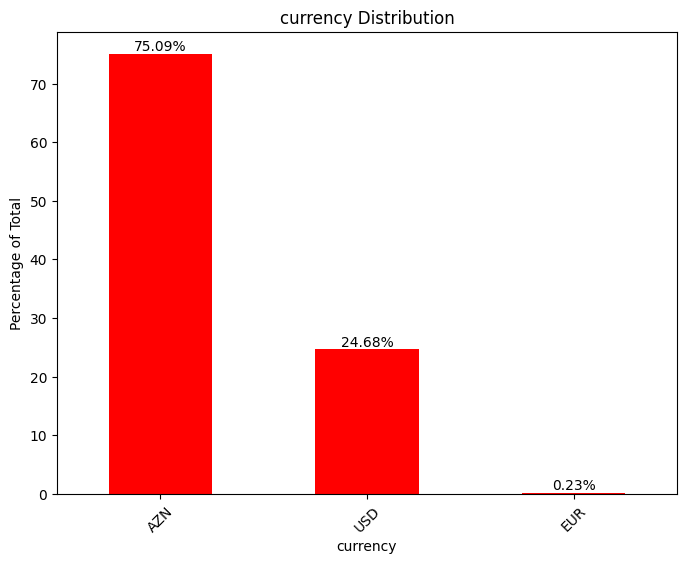

In [11]:
def plot_categorical_percentage(data, column):
    counts = data[column].value_counts(normalize=True) * 100
    plt.figure(figsize=(8, 6))
    ax = counts.plot(kind='bar', color='red')

    for i in ax.patches:
        ax.text(i.get_x() + i.get_width()/2, i.get_height(), f'{round(i.get_height(), 2)}%', ha='center', va='bottom')

    plt.xlabel(column)
    plt.ylabel('Percentage of Total')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()
plot_categorical_percentage(df, 'currency')


### Changing price according currency

In [13]:
df['price'] = df['price'].astype(float)

In [14]:
df.loc[df['currency']=='USD',['price']]=df.loc[df['currency']=='USD',['price']].apply(lambda x:x*1.7)
df.loc[df['currency']=='EUR',['price']]=df.loc[df['currency']=='EUR',['price']].apply(lambda x:x*1.84)

### Filling nan  seats according type_of_ban

In [15]:
df[df['seats'].isnull()][["type_of_ban"]].value_counts()

type_of_ban    
Sedan              1542
Offroader / SUV     820
Hetçbek             257
Universal           149
Liftbek             119
Yük maşını           89
Furqon               47
Dartqı               30
Pikap                23
Minivan              21
Motosiklet           21
Kupe                 20
Mikroavtobus         15
Avtobus               7
Kabriolet             4
Rodster               3
Moped                 3
Van                   2
Name: count, dtype: int64

In [16]:
df.loc[df["type_of_ban"]=="Sedan",["seats"]].value_counts() # 5 is mot frequent seat

seats
5        2288
4         532
2           8
6           6
3           5
1           2
7           2
Name: count, dtype: int64

In [17]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Sedan"),['seats'] ] = "5"

In [18]:
#Let's check if the sedans which have different number of seat are correct
df.loc[(df["seats"]=="1") & (df["type_of_ban"]=="Sedan"),["brand","model"]]

,brand,model
3337,Mercedes,C 180
4999,Volkswagen,Passat


In [19]:
df.iloc[[3337, 4999], df.columns.get_loc('seats')]=5

In [20]:
df.loc[(df["seats"]=="2") & (df["type_of_ban"]=="Sedan"),["brand","model"]]

,brand,model
800,Hyundai,Elantra
2132,Daewoo,Leganza
2728,Mercedes,190
2780,Mercedes,E 320
3055,Mercedes,E 220
5079,LADA (VAZ),2115
8664,LADA (VAZ),2107
9524,Opel,Vectra


In [21]:
df.iloc[[800, 2132,2728,2780,3055,5079,8664,9524], df.columns.get_loc('seats')]="5"

In [22]:
df.loc[(df["seats"]=="3") & (df["type_of_ban"]=="Sedan"),["brand","model"]]

,brand,model
1077,Mercedes,E 270
1509,LADA (VAZ),2107
2613,Kia,Magentis
2908,BMW,320
8618,Mercedes,C 230


In [23]:
df.iloc[[1077,1509,2613,2908,8618], df.columns.get_loc('seats')]="5"

In [24]:
df.loc[df["type_of_ban"]=="Offroader / SUV",["seats"]].value_counts()

seats
7        1092
5        1091
4          88
6          19
8+          6
1           1
2           1
Name: count, dtype: int64

In [25]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Offroader / SUV"),["seats"] ] ="7"

In [26]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Offroader / SUV"),["seats"]]="8"

In [27]:
df.loc[df["type_of_ban"]=="Hetçbek",["seats"]].value_counts()

seats
5        458
4         90
6          2
1          1
2          1
7          1
Name: count, dtype: int64

In [28]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Hetçbek"),["seats"] ] ="5"

In [29]:
df.loc[(df["seats"]=="1") & (df["type_of_ban"]=="Hetçbek"),["brand","model"]]

,brand,model
8240,Opel,Astra


In [30]:
df.iloc[[8240,6296,9479,2910,6815], df.columns.get_loc('seats')]="5"

In [31]:
df.loc[(df["seats"]=="6") & (df["type_of_ban"]=="Hetçbek"),["brand","model"]]

,brand,model


In [32]:
df.loc[df["type_of_ban"]=="Universal",["seats"]].value_counts()

seats
5        290
4         44
7         13
6          2
Name: count, dtype: int64

In [33]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Universal"),["seats"] ] ="5"

In [34]:
df.loc[df["type_of_ban"]=="Liftbek",["seats"]].value_counts()

seats
5        168
4         41
2          1
Name: count, dtype: int64

In [35]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Liftbek"),["seats"] ] ="5"

In [36]:
df.loc[(df["seats"]=="2") & (df["type_of_ban"]=="Liftbek"),["brand","model","release_date"]]

,brand,model,release_date
4496,Toyota,Prius,2009


In [37]:
df.iloc[[4496], df.columns.get_loc('seats')]="5"

In [38]:
df.loc[df["type_of_ban"]=="Yük maşını",["seats"]].value_counts()

seats
3        83
2        34
5         5
6         4
4         2
1         1
7         1
8+        1
Name: count, dtype: int64

In [39]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Yük maşını"),["seats"] ] ="3"

In [40]:
df.loc[(df["seats"]=="1") & (df["type_of_ban"]=="Yük maşını"),["brand","model","release_date"]]

,brand,model,release_date
1301,KamAz,65115,2008


In [41]:
df.iloc[[1301], df.columns.get_loc('seats')]="3"

In [42]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Yük maşını"),["brand","model","release_date"]]

,brand,model,release_date
6216,Mercedes,Axor 1829,2009


In [43]:
df.iloc[[6216], df.columns.get_loc('seats')]="3"

In [44]:
df.loc[df["type_of_ban"]=="Furqon",["seats"]].value_counts()

seats
3        89
2        23
4         4
5         4
6         2
8+        2
1         1
Name: count, dtype: int64

In [45]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Furqon"),["seats"] ] ="3"

In [46]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Furqon"),["brand","model","release_date"]]

,brand,model,release_date
733,Ford,Transit,2000
8954,Ford,Transit,1999


In [47]:
df.iloc[[733,8954], df.columns.get_loc('seats')]="12"

In [48]:
df.loc[(df["seats"]=="1") & (df["type_of_ban"]=="Furqon"),["brand","model","release_date"]]

,brand,model,release_date
1755,Ford,Transit,1997


In [49]:
df.iloc[[1755], df.columns.get_loc('seats')]="8"

In [50]:
df.loc[df["type_of_ban"]=="Dartqı",["seats"]].value_counts()

seats
2        19
3         4
4         3
Name: count, dtype: int64

In [51]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Dartqı"),["seats"] ] ="2"

In [52]:
df.loc[df["type_of_ban"]=="Pikap",["seats"]].value_counts()

seats
5        19
4         3
2         2
6         2
Name: count, dtype: int64

In [53]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Pikap"),["seats"] ] ="5"

In [54]:
df.loc[(df["seats"]=="2") & (df["type_of_ban"]=="Pikap"),["brand","model","release_date"]]

,brand,model,release_date
1351,LADA (VAZ),2105,2008
1883,GAZ,31105,2004


In [55]:
df.iloc[[1883,1351], df.columns.get_loc('seats')]="4"

In [56]:
df.loc[df["type_of_ban"]=="Minivan",["seats"]].value_counts()

seats
7        69
8+       41
5        36
6         5
3         4
4         3
Name: count, dtype: int64

In [57]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Minivan"),["brand","model","release_date"]]

,brand,model,release_date
331,Hyundai,H-1,2008
1323,Hyundai,H-1,2009
1362,Mercedes,Vito 116,2011
1366,Mercedes,Vito,2009
1692,Mercedes,Vito,2012
1750,Kia,Carnival,2015
2112,Hyundai,H-1,2017
2224,Kia,Carnival,2015
2468,Hyundai,H-1,2006
2685,Toyota,Sienna,2017


In [58]:
#getdi Hyundai H1,Kia carnival,mercedes vito,fiat scudo,Toyota	Sienna ,Ford	Transit

In [59]:
df.iloc[[331,1323,2112,2468,3229,6163,7812], df.columns.get_loc('seats')]="12"

In [60]:
df.iloc[[1750,2224,3077,4921,7187,7518,7534,7627,7892,8032], df.columns.get_loc('seats')]="8"

In [61]:
df.iloc[[1362,1692,2800,2858,3093,3136,3350,4883,5268,5361,6317,6492,6497,7286,7985,8795,1366,6204,9675], df.columns.get_loc('seats')]="8"

In [62]:
df.iloc[[2915], df.columns.get_loc('seats')]="9"

In [63]:
df.iloc[[2685,8773], df.columns.get_loc('seats')]="8"

In [64]:
df.iloc[[6488], df.columns.get_loc('seats')]="12"

In [65]:
df.iloc[[3902], df.columns.get_loc('seats')]="11"

In [66]:
df.loc[df["type_of_ban"]=="Minivan",["seats"]].value_counts()

seats
7        69
5        36
8        31
12        8
6         5
3         4
4         3
11        1
9         1
Name: count, dtype: int64

In [67]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Minivan"),["seats"] ] ="7"

In [68]:
df.loc[df["type_of_ban"]=="Motosiklet",["seats"]].value_counts()

seats
2        12
1        10
5         1
Name: count, dtype: int64

In [69]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Motosiklet"),["seats"] ] ="2"

In [70]:
df.loc[(df["seats"]=="5") & (df["type_of_ban"]=="Motosiklet"),["brand","model","release_date"]]

,brand,model,release_date
3222,Tufan,Istiqlal,2020


In [71]:
df.iloc[[3222], df.columns.get_loc('seats')]="2"

In [72]:
df.loc[df["type_of_ban"]=="Kupe",["seats"]].value_counts()

seats
4        26
5        11
2         2
Name: count, dtype: int64

In [73]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Kupe"),["seats"] ] ="4"

In [74]:
df.loc[df["type_of_ban"]=="Mikroavtobus",["seats"]].value_counts()

seats
8+       20
7         3
3         1
Name: count, dtype: int64

In [75]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Mikroavtobus"),["brand","model","release_date"]]

,brand,model,release_date
76,Mercedes,208 D,1991
503,Mercedes,208 D,1987
1004,Mercedes,Sprinter 524,2008
1382,Mercedes,Sprinter 311,2007
2388,Mercedes,Sprinter 524,2007
2992,Ford,Transit,1994
3125,Mercedes,208 D,1992
3217,Ford,Transit,1998
3617,Mercedes,208 D,1991
4449,Mercedes,208 D,1994


In [76]:
#getdi Mercedes	208 D,Mercedes	Sprinter,Ford	Transit	1994,Kia	Pregio	2004,Volkswagen	Crafter	2009

In [77]:
df.iloc[[76,503,3125,3617,4449,9724], df.columns.get_loc('seats')]="9"

In [78]:
df.iloc[[1004,1382,2388,4876,7363,9724,], df.columns.get_loc('seats')]="3"

In [79]:
df.iloc[[2992,3217,5213,5374,9840,], df.columns.get_loc('seats')]="17"

In [80]:
df.iloc[[7799,9554], df.columns.get_loc('seats')]="12"

In [81]:
df.iloc[[9875,9969], df.columns.get_loc('seats')]="3"

In [82]:
df.loc[df["type_of_ban"]=="Mikroavtobus",["seats"]].value_counts()

seats
3        9
17       5
9        5
7        3
12       2
Name: count, dtype: int64

In [83]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Mikroavtobus"),["seats"] ] ="3"

In [84]:
df.loc[df["type_of_ban"]=="Avtobus",["seats"]].value_counts()

seats
8+       4
Name: count, dtype: int64

In [85]:
df.loc[(df["seats"]=="8+") & (df["type_of_ban"]=="Avtobus"),["brand","model","release_date"]]

,brand,model,release_date
822,Isuzu,Ecobus,2011
3629,Hyundai,County,1998
3876,Mitsubishi,Prenses,1996
5861,Hyundai,Chorus,2007


In [86]:
df.iloc[[822], df.columns.get_loc('seats')]="25"

In [87]:
df.iloc[[3629,3876], df.columns.get_loc('seats')]="20"

In [88]:
df.iloc[[5861], df.columns.get_loc('seats')]="18"

In [89]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Avtobus"),["seats"] ] ="20"

In [90]:
df.loc[df["type_of_ban"]=="Kabriolet",["seats"]].value_counts()

seats
4        5
Name: count, dtype: int64

In [91]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Kabriolet"),["seats"] ] ="4"

In [92]:
df.loc[df["type_of_ban"]=="Rodster",["seats"]].value_counts()

seats
2        4
Name: count, dtype: int64

In [93]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Rodster"),["seats"] ] = "2"

In [94]:
df.loc[df["type_of_ban"]=="Moped",["seats",'brand','model']]

,seats,brand,model
3265,NaN,Tufan,M50
4989,NaN,Tufan,CUB50 S
8103,NaN,Minsk,D4 125


In [95]:
df.loc[(df['seats'].isnull()) & (df["type_of_ban"]=="Moped"),["seats"] ] = "2"

In [96]:
df.loc[df["type_of_ban"]=="Van",["seats","brand","model"]]

,seats,brand,model
1380,NaN,Mercedes,Vito 115
2434,8+,Mercedes,Vito
5667,NaN,Mercedes,Vito
6599,8+,DFSK,C-37
6836,3,Mercedes,Vito 115
7414,3,Ford,Transit
7800,7,Mercedes,Viano
7816,3,Mercedes,Vito
7942,7,Mercedes,Viano
8538,8+,Mercedes,Vito 111


In [97]:
df.iloc[[1380,2434,5567,6836,7816,8538,6599,5667], df.columns.get_loc('seats')]="8"

<Axes: >

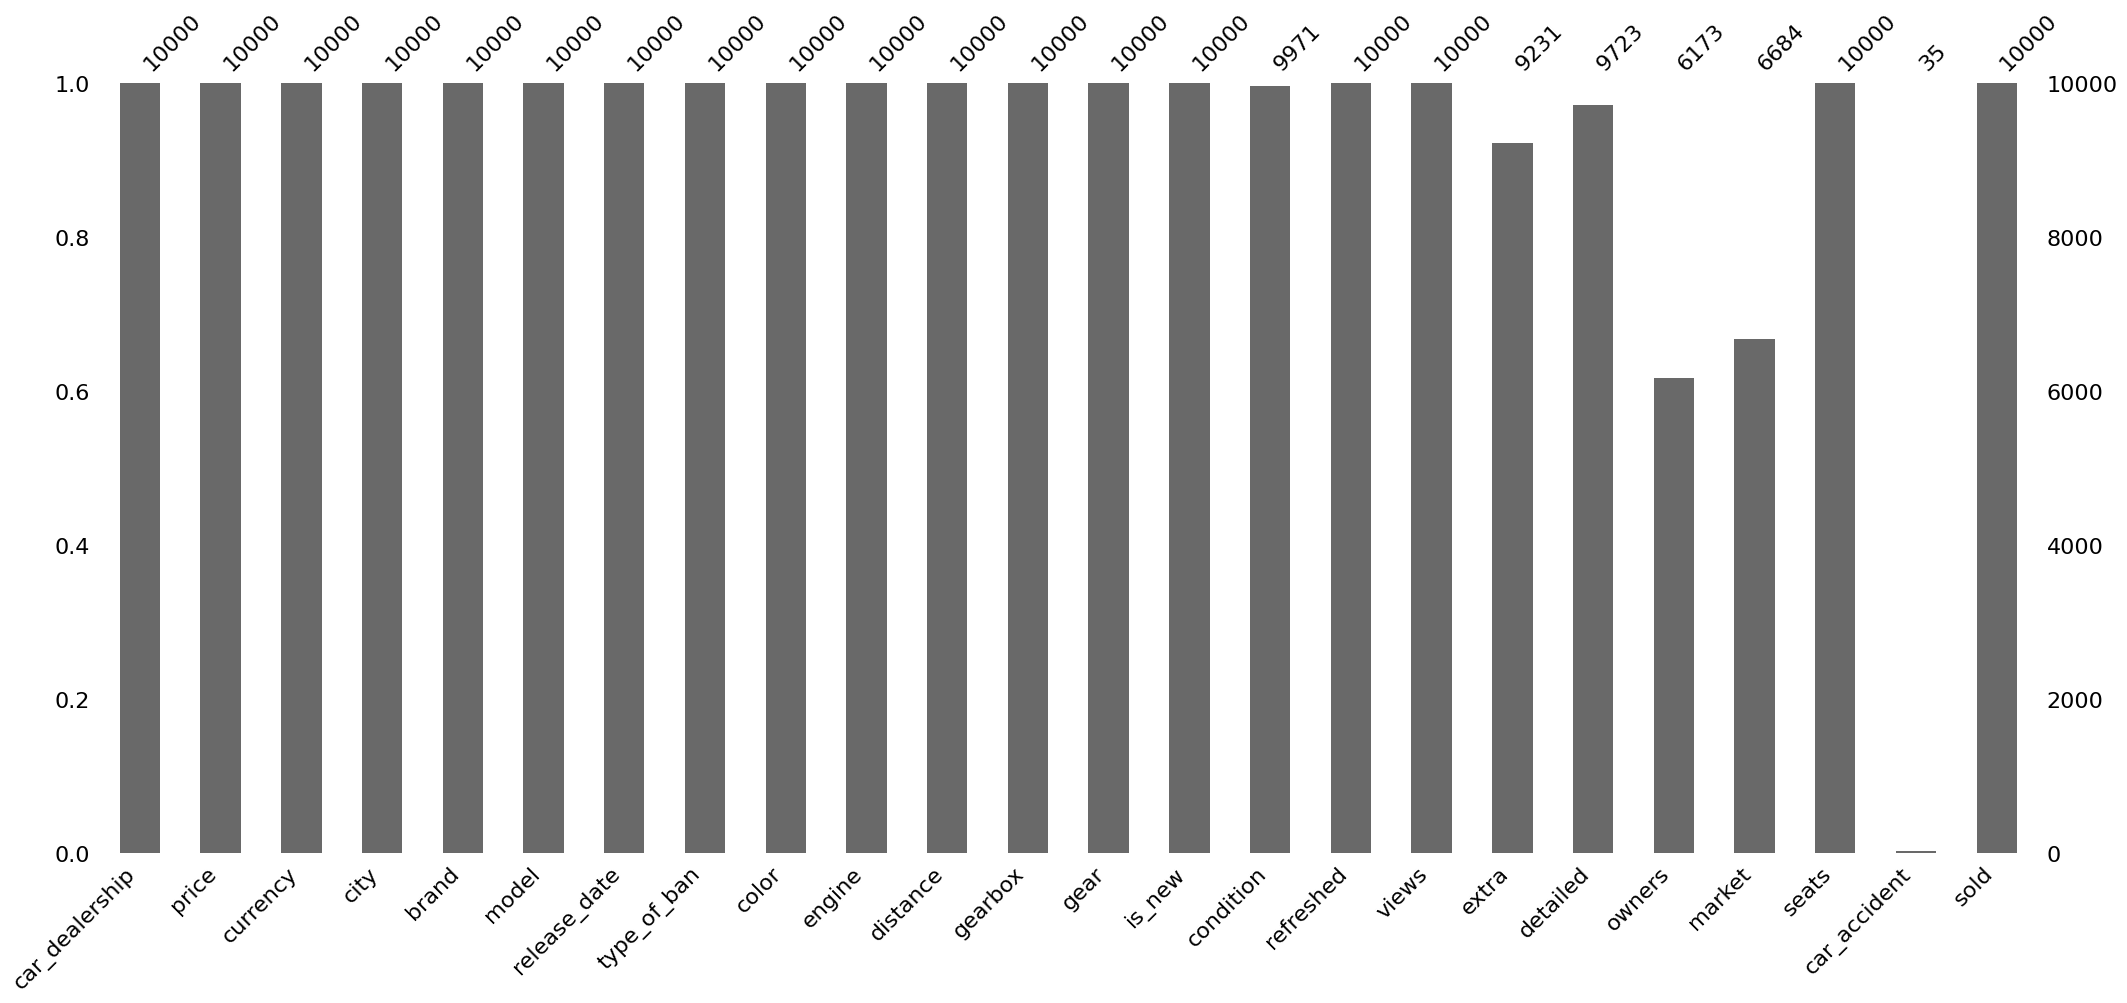

In [98]:
msno.bar(df)

In [99]:
df.loc[df["seats"]=="8+",["brand","model","type_of_ban"]]

,brand,model,type_of_ban


In [100]:
df["seats"].value_counts()

seats
5     6479
7     2023
4      866
3      343
2      155
8       46
6       40
12      12
1       11
20       9
9        6
17       5
5        2
25       1
11       1
18       1
Name: count, dtype: int64

In [101]:
df["seats"]=df["seats"].astype(int)

In [102]:
df["market"].value_counts()

market
Avropa         2066
Rəsmi diler    1441
Amerika        1311
Koreya          710
Rusiya          475
Digər           376
Yaponiya        225
Dubay            80
Name: count, dtype: int64

### Filling na market values  with same brand same model cars' market values

In [103]:
market_mapping = df.groupby(['brand', 'model'])['market'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
market_mapping

brand             model                  
Alfa Romeo        159                             Avropa
                  4C                         Rəsmi diler
Audi              A4                             Amerika
                  A5                         Rəsmi diler
                  A6                         Rəsmi diler
                  A6 allroad                      Avropa
                  A7                              Avropa
                  A7 Sportback               Rəsmi diler
                  A8                         Rəsmi diler
                  Q3                              Avropa
                  Q5                                None
                  Q7                         Rəsmi diler
                  Q8                              Avropa
                  R8                                None
                  RS3                        Rəsmi diler
                  RS7                        Rəsmi diler
                  S5                          

In [104]:
def fill_market(row):
    if pd.isnull(row['market']):
        return market_mapping.get((row['brand'], row['model']), row['market'])
    else:
        return row['market']

In [105]:
df['market'] = df.apply(fill_market, axis=1)


In [106]:
df["market"].value_counts()

market
Avropa         3250
Amerika        2013
Rəsmi diler    1941
Koreya          928
Rusiya          818
Digər           448
Yaponiya        285
Dubay            80
Name: count, dtype: int64

<Axes: >

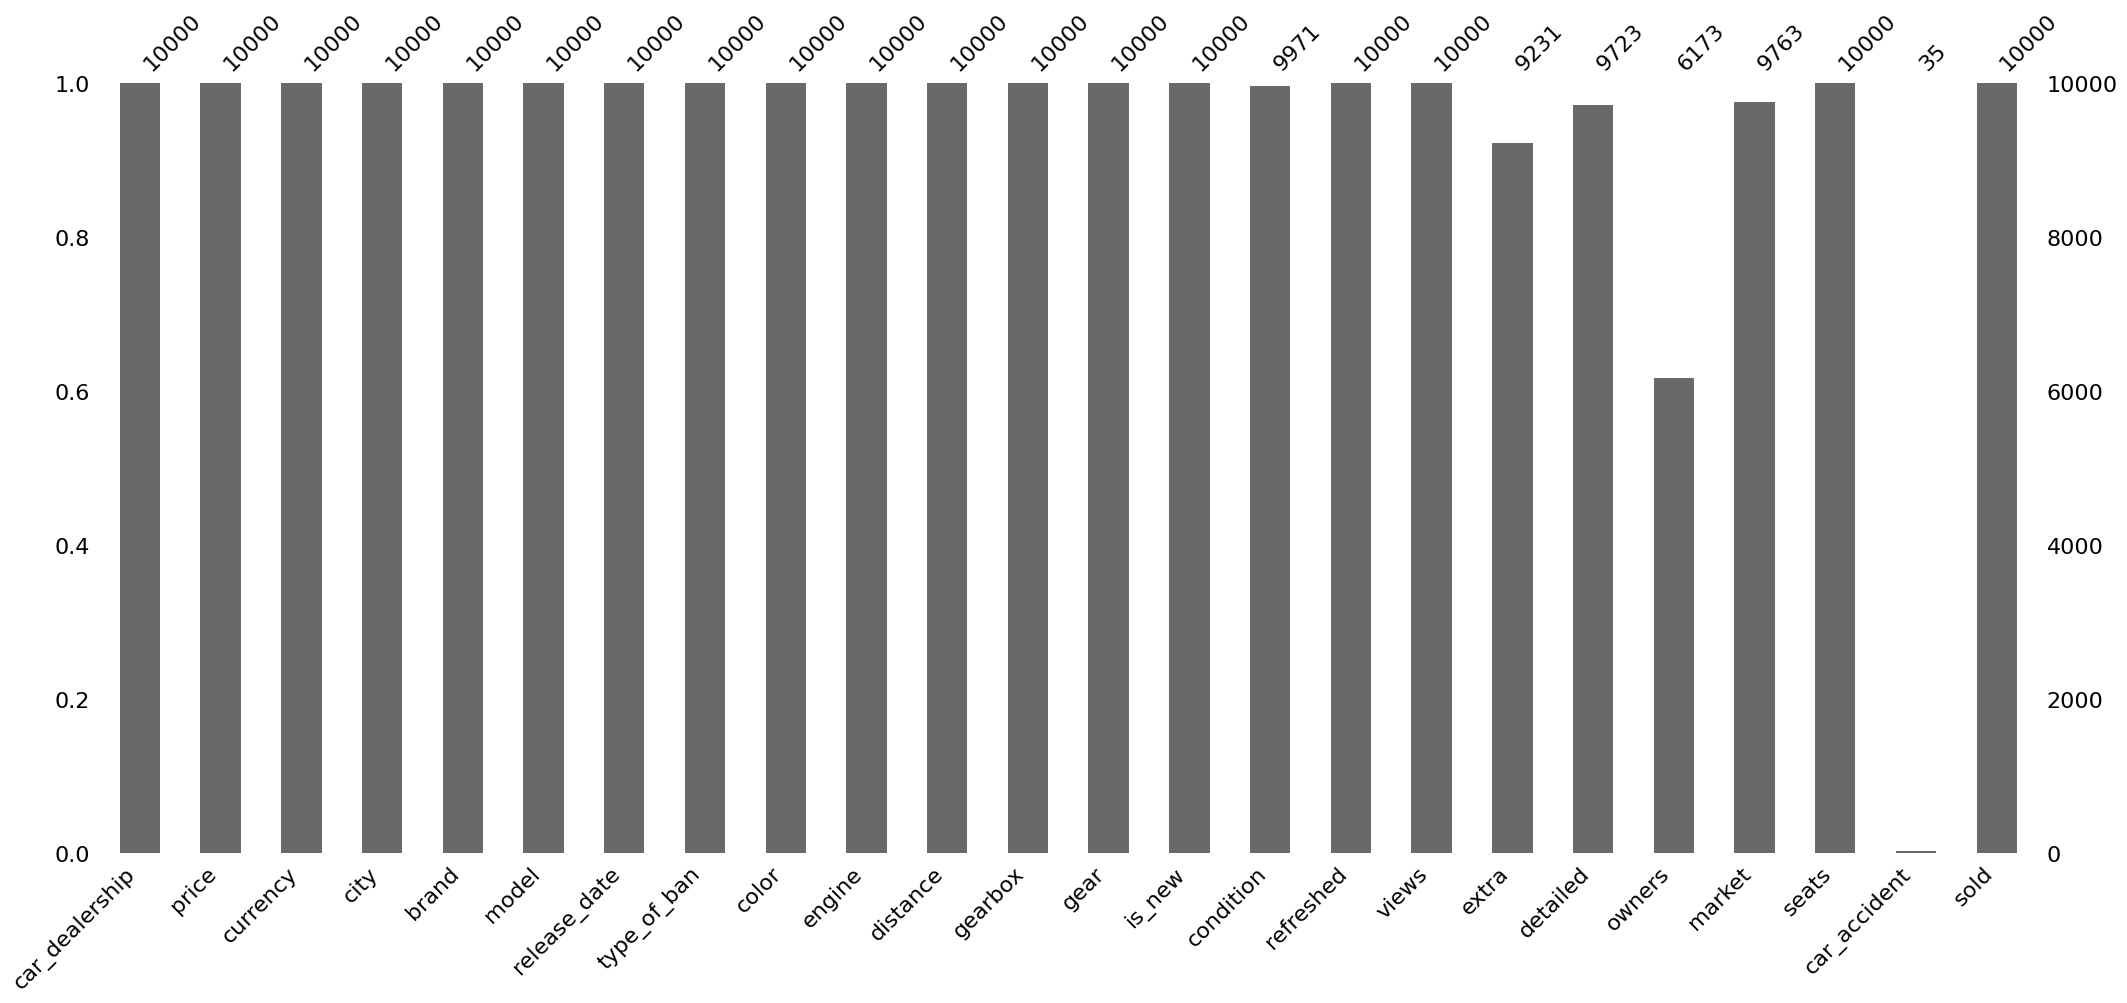

In [107]:
msno.bar(df)

In [108]:
df.isnull().sum()

car_dealership       0
price                0
currency             0
city                 0
brand                0
model                0
release_date         0
type_of_ban          0
color                0
engine               0
distance             0
gearbox              0
gear                 0
is_new               0
condition           29
refreshed            0
views                0
extra              769
detailed           277
owners            3827
market             237
seats                0
car_accident      9965
sold                 0
dtype: int64

In [109]:
most_frequent_market = df['market'].mode()[0]  # Calculate the most frequent value
df['market'].fillna(most_frequent_market, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13616\3028270211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['market'].fillna(most_frequent_market, inplace=True)


<Axes: >

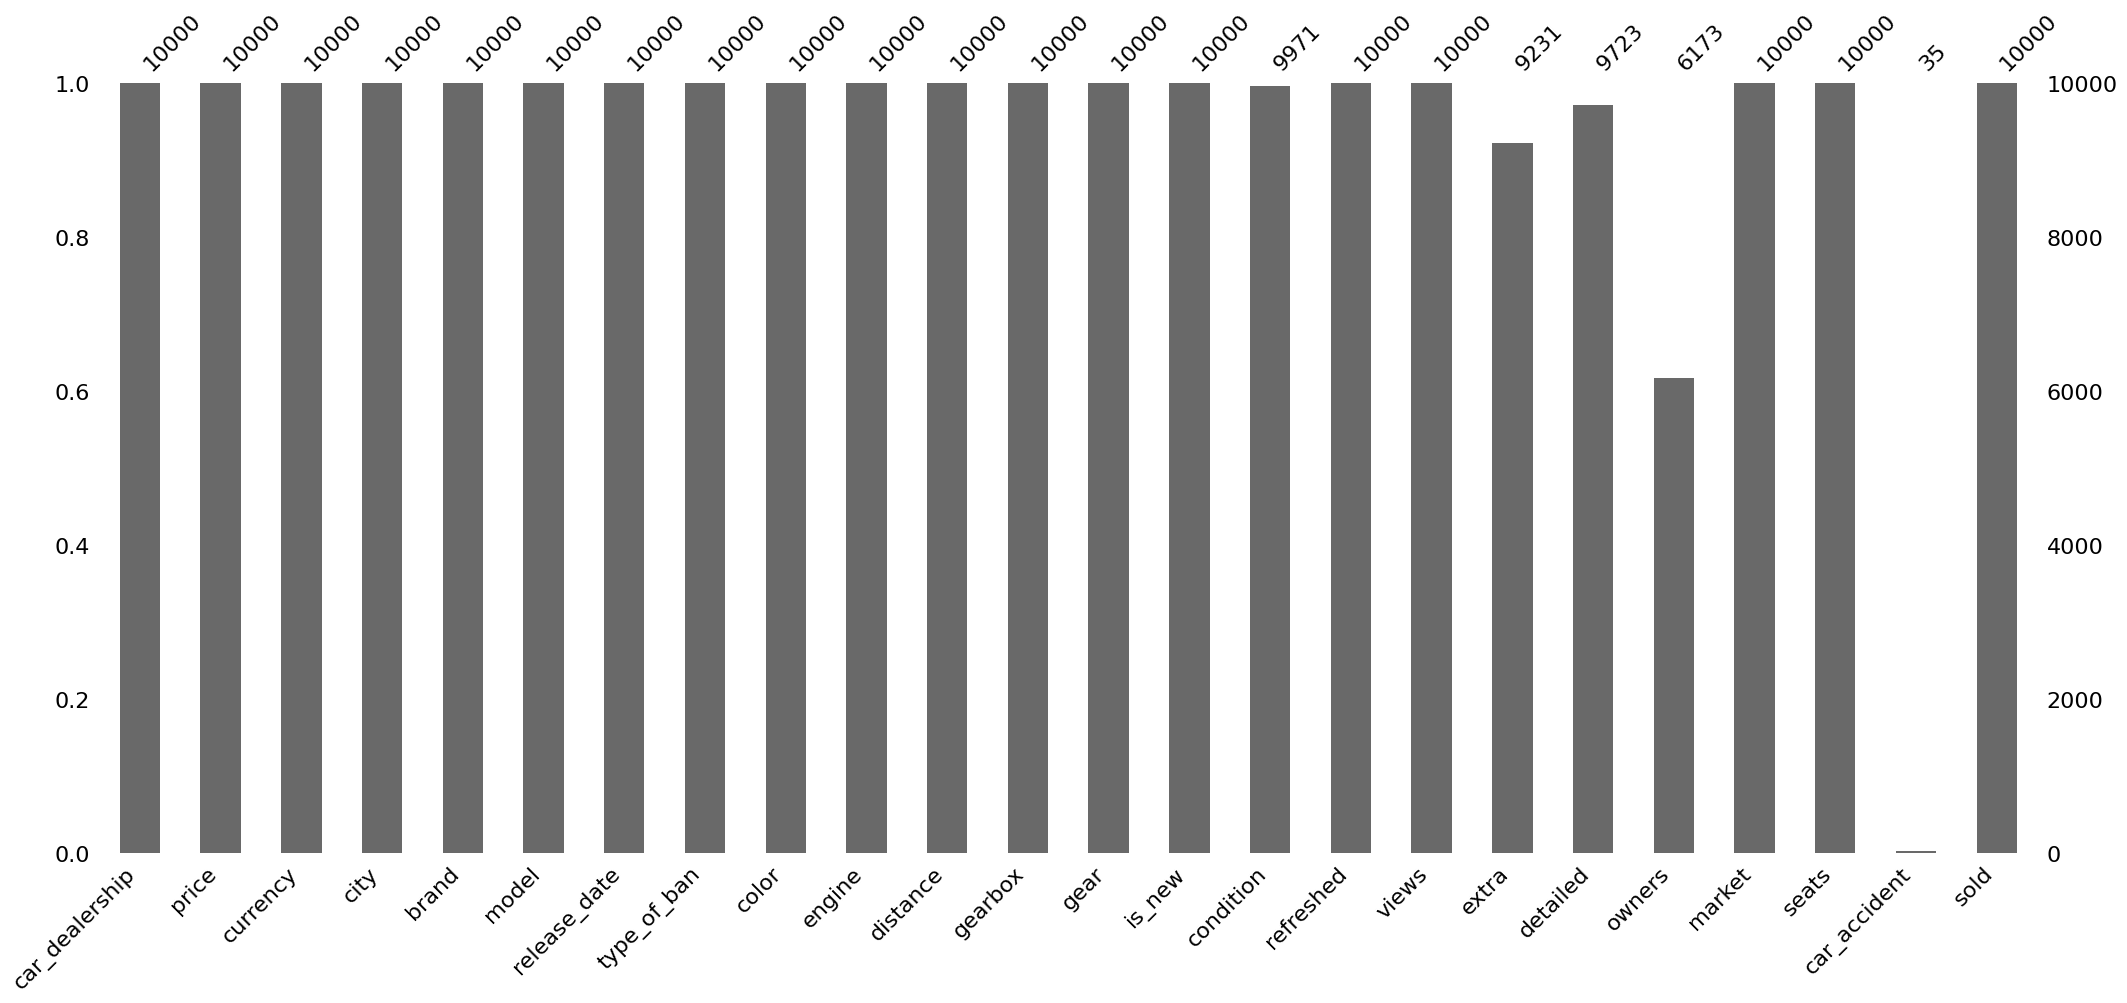

In [110]:
msno.bar(df)

In [111]:
df["market"].value_counts()

market
Avropa         3487
Amerika        2013
Rəsmi diler    1941
Koreya          928
Rusiya          818
Digər           448
Yaponiya        285
Dubay            80
Name: count, dtype: int64

### Filling extra na values with same brand model extra values.

In [112]:
extra_mapping = df.groupby(['brand', 'model'])['extra'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
extra_mapping

brand             model                  
Alfa Romeo        159                        Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...
                  4C                         Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...
Audi              A4                         Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...
                  A5                         Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...
                  A6                         Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...
                  A6 allroad                 ABS, Lyuk, Yağış sensoru, Mərkəzi qapanma, Kon...
                  A7                         Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...
                  A7 Sportback               Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...
                  A8                         Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...
                  Q3                         Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...
        

In [113]:
def fill_market(row):
    if pd.isnull(row['extra']):
        return extra_mapping.get((row['brand'], row['model']), row['extra'])
    else:
        return row['extra']
df['extra'] = df.apply(fill_market, axis=1)


In [114]:
df.isnull().sum()

car_dealership       0
price                0
currency             0
city                 0
brand                0
model                0
release_date         0
type_of_ban          0
color                0
engine               0
distance             0
gearbox              0
gear                 0
is_new               0
condition           29
refreshed            0
views                0
extra               91
detailed           277
owners            3827
market               0
seats                0
car_accident      9965
sold                 0
dtype: int64

In [115]:
most_frequent_extra = df['extra'].mode()[0]  
df['extra'].fillna(most_frequent_extra, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13616\4211008534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['extra'].fillna(most_frequent_extra, inplace=True)


In [116]:
df['distance'] = pd.to_numeric(df['distance'].str.replace(' km', '').str.replace(' ', ''))

In [117]:
df.isnull().sum()

car_dealership       0
price                0
currency             0
city                 0
brand                0
model                0
release_date         0
type_of_ban          0
color                0
engine               0
distance             0
gearbox              0
gear                 0
is_new               0
condition           29
refreshed            0
views                0
extra                0
detailed           277
owners            3827
market               0
seats                0
car_accident      9965
sold                 0
dtype: int64

In [118]:
df.isnull().sum()

car_dealership       0
price                0
currency             0
city                 0
brand                0
model                0
release_date         0
type_of_ban          0
color                0
engine               0
distance             0
gearbox              0
gear                 0
is_new               0
condition           29
refreshed            0
views                0
extra                0
detailed           277
owners            3827
market               0
seats                0
car_accident      9965
sold                 0
dtype: int64

In [119]:
most_frequent_owner = df['owners'].mode()[0]  
df.fillna({"owners": most_frequent_owner}, inplace=True)

In [120]:
most_frequent_condition = df['condition'].mode()[0]  
df.fillna({"condition": most_frequent_condition}, inplace=True)

### If it has more than 0 owner then the car is not new.

In [121]:
df.loc[(df["owners"]!="0") & (df["is_new"]!="Xeyr"),["is_new"]]="Xeyr"

### Feature engineering preprocessing

In [122]:
df_features = df.copy()

In [123]:
extra_column_names= df_features['extra'].value_counts().index[0].split(", ")
for col in extra_column_names:
    df_features[col] = df_features['extra'].apply(lambda x: 1 if col in str(x) else 0)

In [124]:
df_features.drop("extra",axis=1,inplace = True)

In [125]:
def split_engine(value):
    parts = value.split('/')
    part1 = parts[0].strip().split()[0] if len(parts) > 0 else None 
    part2 = parts[1].strip().split()[0] if len(parts) > 1 else None 
    part3 = parts[2].strip() if len(parts) > 2 else None             
    return part1, part2, part3

df_features[['engine_power', 'horsepower', 'fuel']] = df_features['engine'].apply(split_engine).apply(pd.Series)
df_features['engine_power'] = pd.to_numeric(df_features['engine_power'], errors='coerce').astype(int)
df_features['horsepower'] = pd.to_numeric(df_features['horsepower'], errors='coerce').astype(int)


df_features.head()


,car_dealership,price,currency,city,brand,model,release_date,type_of_ban,color,engine,distance,gearbox,gear,is_new,condition,refreshed,views,detailed,owners,market,seats,car_accident,sold,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel
0,0,10500.0,AZN,Bakı,Honda,CR-V,2000,Offroader / SUV,Yaşıl,2.0 L/147 a.g./Benzin,258200,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1064,NaN,1,Digər,7,NaN,0,1,1,0,1,1,1,1,1,0,1,0,0,0,2,147,Benzin
1,0,15900.0,AZN,Bakı,Kia,Rio,2012,Sedan,Qəhvəyi,1.4 L/107 a.g./Benzin,246000,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,953,"Salon maşınıdı! Motor, korobka, elektronika ə...",2,Rəsmi diler,4,NaN,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1,107,Benzin
2,1,72900.0,AZN,Bakı,Volkswagen,Passat,2022,Sedan,Qara,1.4 L/218 a.g./Plug-in Hibrid,0,Robotlaşdırılmış,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",17.05.2023,30568,2 il daxili zamanət - GTE mode - PLUG-İN - Rəq...,1,Amerika,5,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,Plug-in Hibrid
3,0,35530.0,USD,Bakı,Mercedes,S 500,2012,Sedan,Qara,4.7 L/435 a.g./Benzin,160000,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,166,Salam aleykum Mersedes S 500 long ideal Veziyy...,1,Avropa,5,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,435,Benzin
4,0,13800.0,AZN,Bakı,Honda,Civic,2007,Sedan,Ağ,1.3 L/95 a.g./Hibrid,200000,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,1727,Avtomobil 5 aydir ki gelib. Cox seliqeli ve ba...,2,Amerika,5,NaN,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,95,Hibrid


In [126]:
df_features["condition"].value_counts()

condition
Vuruğu yoxdur, rənglənməyib    9172
Vuruğu yoxdur, rənglənib        702
Vuruğu var, rənglənib            74
Vuruğu var, rənglənməyib         52
Name: count, dtype: int64

In [127]:
df_features['condition_1'] = df_features['condition'].apply(lambda x: 1 if 'var' in x else 0)
df_features['condition_2'] = df_features['condition'].apply(lambda x: 0 if 'məyib' in x else 1)

In [128]:
def split_date(value):
    parts = value.split('.') 
    day = parts[0] if len(parts) > 0 else None  
    month = parts[1] if len(parts) > 1 else None  
    year = parts[2] if len(parts) > 2 else None 
    return day, month, year
df_features[['day', 'month', 'year']] = df_features['refreshed'].apply(split_date).apply(pd.Series).astype(int)
df_features.head()


,car_dealership,price,currency,city,brand,model,release_date,type_of_ban,color,engine,distance,gearbox,gear,is_new,condition,refreshed,views,detailed,owners,market,seats,car_accident,sold,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel,condition_1,condition_2,day,month,year
0,0,10500.0,AZN,Bakı,Honda,CR-V,2000,Offroader / SUV,Yaşıl,2.0 L/147 a.g./Benzin,258200,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1064,NaN,1,Digər,7,NaN,0,1,1,0,1,1,1,1,1,0,1,0,0,0,2,147,Benzin,0,0,27,5,2023
1,0,15900.0,AZN,Bakı,Kia,Rio,2012,Sedan,Qəhvəyi,1.4 L/107 a.g./Benzin,246000,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,953,"Salon maşınıdı! Motor, korobka, elektronika ə...",2,Rəsmi diler,4,NaN,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1,107,Benzin,0,0,27,5,2023
2,1,72900.0,AZN,Bakı,Volkswagen,Passat,2022,Sedan,Qara,1.4 L/218 a.g./Plug-in Hibrid,0,Robotlaşdırılmış,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",17.05.2023,30568,2 il daxili zamanət - GTE mode - PLUG-İN - Rəq...,1,Amerika,5,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,Plug-in Hibrid,0,0,17,5,2023
3,0,35530.0,USD,Bakı,Mercedes,S 500,2012,Sedan,Qara,4.7 L/435 a.g./Benzin,160000,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,166,Salam aleykum Mersedes S 500 long ideal Veziyy...,1,Avropa,5,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,435,Benzin,0,0,28,5,2023
4,0,13800.0,AZN,Bakı,Honda,Civic,2007,Sedan,Ağ,1.3 L/95 a.g./Hibrid,200000,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,1727,Avtomobil 5 aydir ki gelib. Cox seliqeli ve ba...,2,Amerika,5,NaN,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,95,Hibrid,0,0,28,5,2023


### Dropping some columns

In [129]:
df_features.head()

,car_dealership,price,currency,city,brand,model,release_date,type_of_ban,color,engine,distance,gearbox,gear,is_new,condition,refreshed,views,detailed,owners,market,seats,car_accident,sold,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel,condition_1,condition_2,day,month,year
0,0,10500.0,AZN,Bakı,Honda,CR-V,2000,Offroader / SUV,Yaşıl,2.0 L/147 a.g./Benzin,258200,Avtomat,Tam,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,1064,NaN,1,Digər,7,NaN,0,1,1,0,1,1,1,1,1,0,1,0,0,0,2,147,Benzin,0,0,27,5,2023
1,0,15900.0,AZN,Bakı,Kia,Rio,2012,Sedan,Qəhvəyi,1.4 L/107 a.g./Benzin,246000,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",27.05.2023,953,"Salon maşınıdı! Motor, korobka, elektronika ə...",2,Rəsmi diler,4,NaN,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1,107,Benzin,0,0,27,5,2023
2,1,72900.0,AZN,Bakı,Volkswagen,Passat,2022,Sedan,Qara,1.4 L/218 a.g./Plug-in Hibrid,0,Robotlaşdırılmış,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",17.05.2023,30568,2 il daxili zamanət - GTE mode - PLUG-İN - Rəq...,1,Amerika,5,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,Plug-in Hibrid,0,0,17,5,2023
3,0,35530.0,USD,Bakı,Mercedes,S 500,2012,Sedan,Qara,4.7 L/435 a.g./Benzin,160000,Avtomat,Arxa,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,166,Salam aleykum Mersedes S 500 long ideal Veziyy...,1,Avropa,5,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,435,Benzin,0,0,28,5,2023
4,0,13800.0,AZN,Bakı,Honda,Civic,2007,Sedan,Ağ,1.3 L/95 a.g./Hibrid,200000,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,1727,Avtomobil 5 aydir ki gelib. Cox seliqeli ve ba...,2,Amerika,5,NaN,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,95,Hibrid,0,0,28,5,2023


In [130]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                10000 non-null  int64  
 1   price                         10000 non-null  float64
 2   currency                      10000 non-null  object 
 3   city                          10000 non-null  object 
 4   brand                         10000 non-null  object 
 5   model                         10000 non-null  object 
 6   release_date                  10000 non-null  int64  
 7   type_of_ban                   10000 non-null  object 
 8   color                         10000 non-null  object 
 9   engine                        10000 non-null  object 
 10  distance                      10000 non-null  int64  
 11  gearbox                       10000 non-null  object 
 12  gear                          10000 non-null  object 
 13  is

In [131]:
df_features.drop(columns=["currency","engine","condition","refreshed","detailed","car_accident"], inplace=True)

In [132]:
df_features["release_date"].value_counts()

release_date
2008    694
2012    689
2013    684
2014    596
2022    573
2007    550
2015    490
2010    464
2011    463
2009    423
2006    418
2016    348
2005    291
2023    289
2017    258
2018    249
2019    237
2021    236
1998    217
2000    196
2020    191
1999    182
1997    157
2004    153
2003    130
2002    112
2001    108
1996     95
1994     63
1995     63
1991     51
1992     46
1993     38
1990     35
1989     34
1985     26
1984     21
1987     19
1986     18
1988     18
1983     16
1982      8
1976      7
1980      6
1978      6
1972      4
1979      3
1977      3
1973      3
1975      2
1981      2
1968      2
1955      1
1963      1
1938      1
1939      1
1964      1
1970      1
1966      1
1974      1
1967      1
1957      1
1965      1
1971      1
1956      1
Name: count, dtype: int64

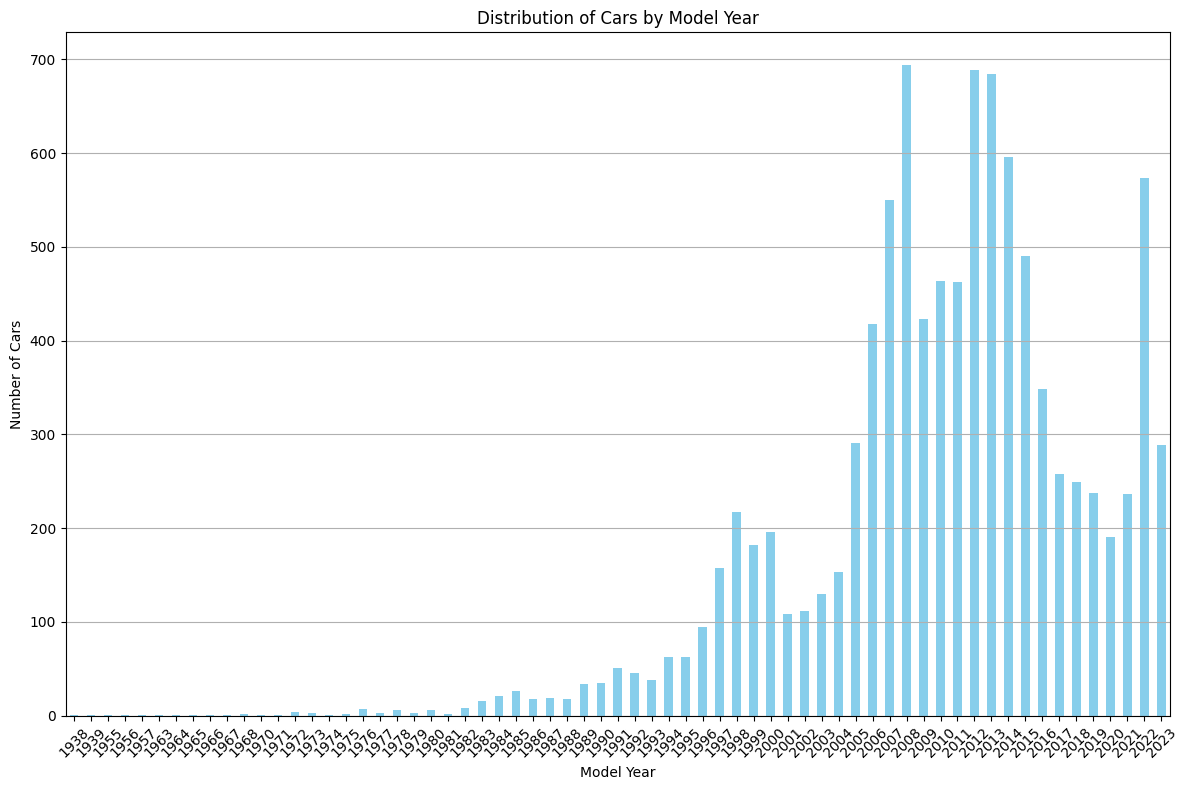

In [133]:
import matplotlib.pyplot as plt

# Group cars by model year and count the number of cars in each year
model_year_counts = df_features.groupby('release_date').size()

# Plot the distribution of cars by model year
plt.figure(figsize=(12, 8))
model_year_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [134]:
bins = [1938, 1980, 2000, 2020, 2040]  
df_features['model_generation'] = pd.cut(df_features['release_date'], bins=bins, labels=['38s-70s', '80s-90s', '2000s-2010s', '2020s+'])

In [135]:
dummy_df = pd.get_dummies(df_features['model_generation'], prefix='generation').astype(int)

df_features = pd.concat([df_features, dummy_df], axis=1)


In [136]:
df_features.head()

,car_dealership,price,city,brand,model,release_date,type_of_ban,color,distance,gearbox,gear,is_new,views,owners,market,seats,sold,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel,condition_1,condition_2,day,month,year,model_generation,generation_38s-70s,generation_80s-90s,generation_2000s-2010s,generation_2020s+
0,0,10500.0,Bakı,Honda,CR-V,2000,Offroader / SUV,Yaşıl,258200,Avtomat,Tam,Xeyr,1064,1,Digər,7,0,1,1,0,1,1,1,1,1,0,1,0,0,0,2,147,Benzin,0,0,27,5,2023,80s-90s,0,1,0,0
1,0,15900.0,Bakı,Kia,Rio,2012,Sedan,Qəhvəyi,246000,Avtomat,Ön,Xeyr,953,2,Rəsmi diler,4,0,0,1,0,1,1,0,1,0,0,1,1,1,0,1,107,Benzin,0,0,27,5,2023,2000s-2010s,0,0,1,0
2,1,72900.0,Bakı,Volkswagen,Passat,2022,Sedan,Qara,0,Robotlaşdırılmış,Ön,Xeyr,30568,1,Amerika,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,218,Plug-in Hibrid,0,0,17,5,2023,2020s+,0,0,0,1
3,0,35530.0,Bakı,Mercedes,S 500,2012,Sedan,Qara,160000,Avtomat,Arxa,Xeyr,166,1,Avropa,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,435,Benzin,0,0,28,5,2023,2000s-2010s,0,0,1,0
4,0,13800.0,Bakı,Honda,Civic,2007,Sedan,Ağ,200000,Avtomat,Ön,Xeyr,1727,2,Amerika,5,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,95,Hibrid,0,0,28,5,2023,2000s-2010s,0,0,1,0


In [137]:
df_features.drop(columns={"model_generation"},inplace=True)

In [138]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                10000 non-null  int64  
 1   price                         10000 non-null  float64
 2   city                          10000 non-null  object 
 3   brand                         10000 non-null  object 
 4   model                         10000 non-null  object 
 5   release_date                  10000 non-null  int64  
 6   type_of_ban                   10000 non-null  object 
 7   color                         10000 non-null  object 
 8   distance                      10000 non-null  int64  
 9   gearbox                       10000 non-null  object 
 10  gear                          10000 non-null  object 
 11  is_new                        10000 non-null  object 
 12  views                         10000 non-null  int64  
 13  ow

In [139]:
df_features.shape

(10000, 42)

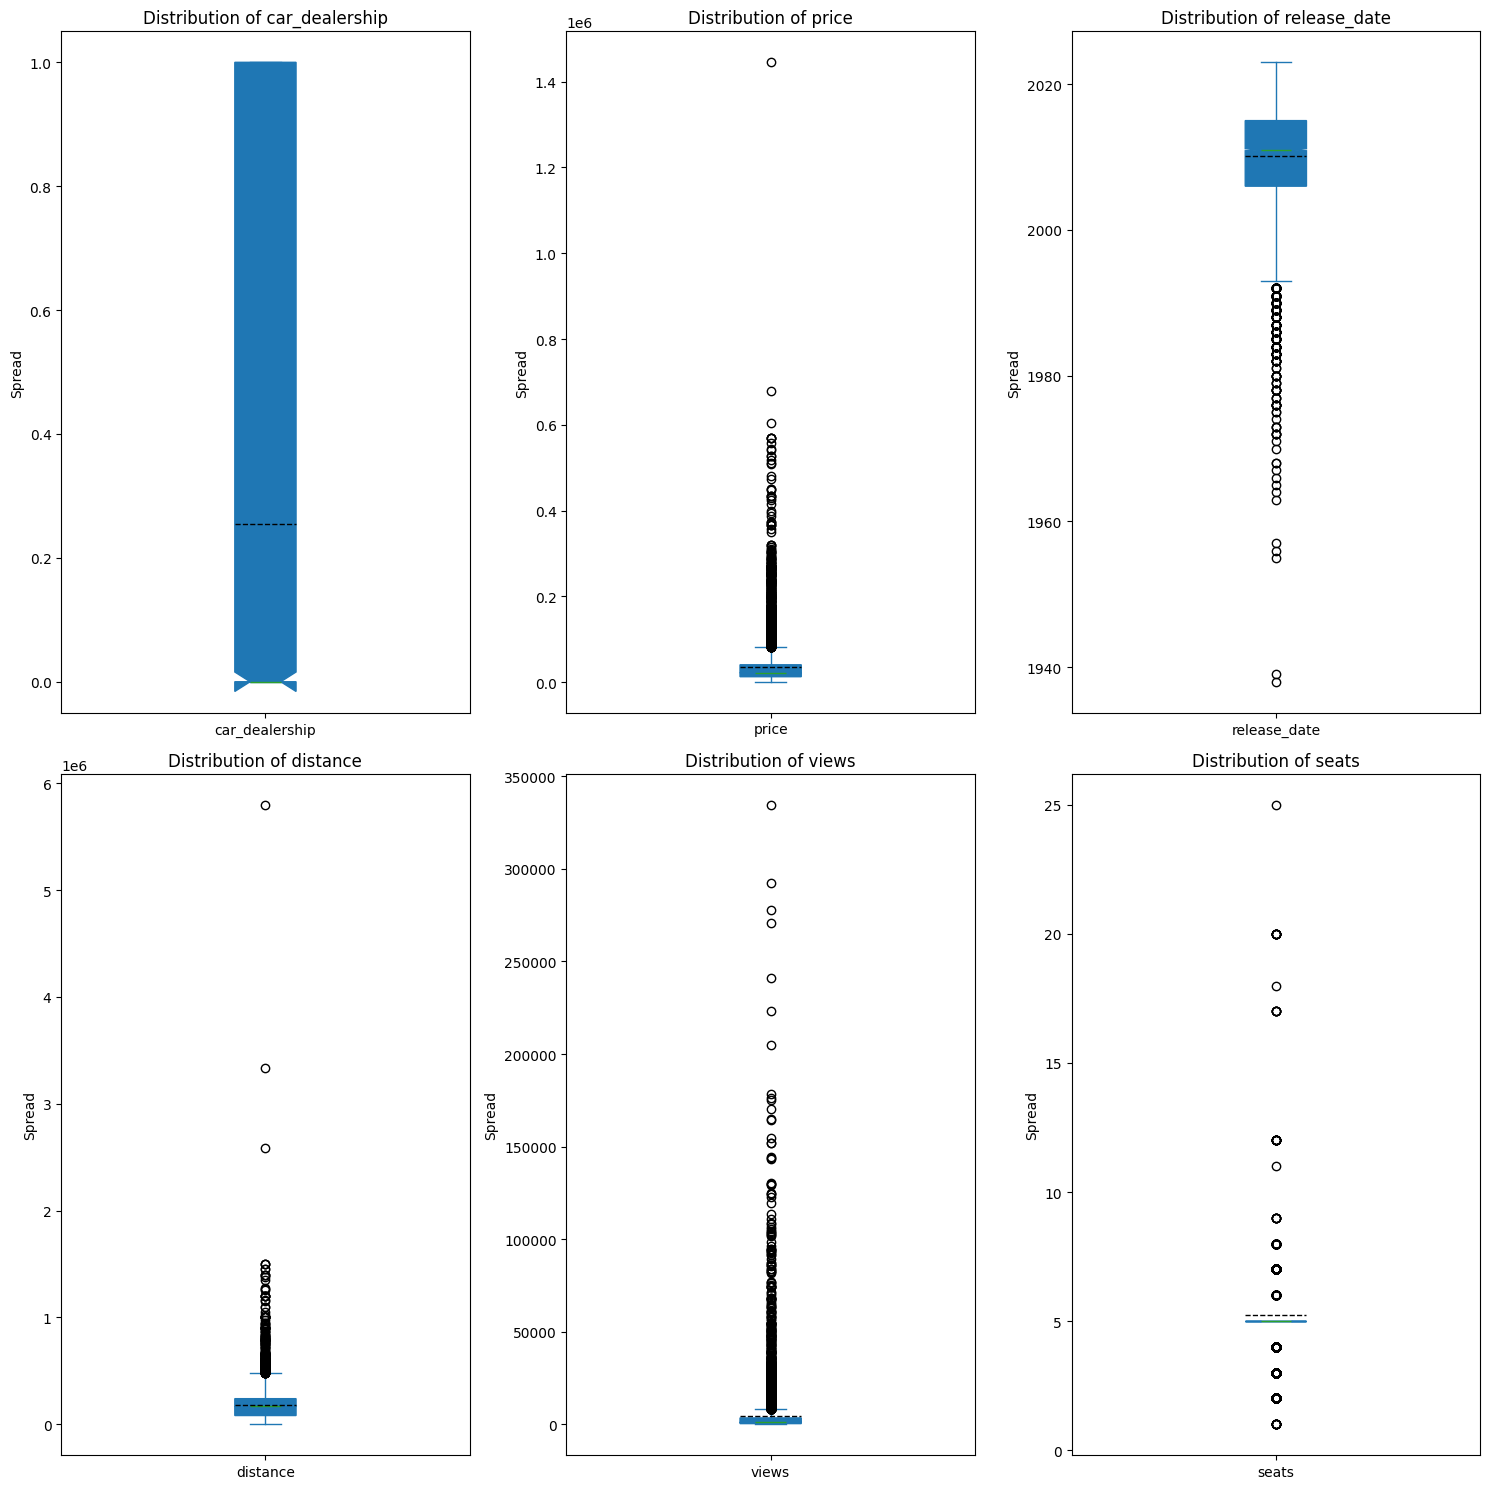

In [140]:
num_features = [i for i in df.drop(columns="sold").columns if df.drop(columns="sold")[i].dtypes != 'object']
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.flatten()
for i,cols in enumerate(num_features):
    ax = axes[i]
    df_features[cols].plot(kind='box', notch=True, patch_artist=True, meanline=True, showmeans=True, meanprops=dict(color='black'),ax=ax)
    
    ax.set_ylabel('Spread')
    
    ax.set_title(f"Distribution of {cols}")
    
plt.tight_layout()
plt.show()


In [141]:
df_features['owners'] = df_features["owners"].replace({"4 və daha çox":"5"})
df_features['owners']=df_features['owners'].astype(int)

In [142]:
df_features["is_new"]=df_features["is_new"].replace({'Bəli':1, 'Xeyr':0})

C:\Users\Asus\AppData\Local\Temp\ipykernel_13616\3912304667.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features["is_new"]=df_features["is_new"].replace({'Bəli':1, 'Xeyr':0})


In [184]:
train, test = train_test_split(df_features, test_size=0.2)

In [185]:
train.head()

,car_dealership,price,city,brand,model,release_date,type_of_ban,color,distance,gearbox,gear,is_new,views,owners,market,seats,sold,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel,condition_1,condition_2,day,month,year,generation_38s-70s,generation_80s-90s,generation_2000s-2010s,generation_2020s+
6323,0,38600.0,Bakı,Hyundai,Santa Fe,2014,Offroader / SUV,Ağ,124600,Avtomat,Ön,0,2016,1,Koreya,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,184,Dizel,0,0,27,5,2023,0,0,1,0
1433,0,26500.0,Bakı,Kia,Sorento,2009,Offroader / SUV,Yaş Asfalt,229000,Avtomat,Ön,0,993,1,Koreya,7,0,1,1,0,1,1,1,1,1,1,1,1,0,1,2,184,Dizel,0,0,28,5,2023,0,0,1,0
1461,0,74630.0,Bakı,Toyota,Land Cruiser,2013,Offroader / SUV,Ağ,138000,Avtomat,Tam,0,535,1,Avropa,7,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,282,Benzin,0,0,28,5,2023,0,0,1,0
1705,0,6000.0,Bakı,LADA (VAZ),2107,2008,Sedan,Ağ,81510,Mexaniki,Arxa,0,505,2,Rusiya,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,75,Benzin,0,1,25,5,2023,0,0,1,0
8778,0,11500.0,Bakı,Mercedes,E 240,1998,Sedan,Göy,246067,Avtomat,Arxa,0,2696,1,Avropa,5,1,1,1,1,0,1,0,1,1,0,1,0,1,0,2,170,Benzin,0,0,28,5,2023,0,1,0,0


In [186]:
test.head()

,car_dealership,price,city,brand,model,release_date,type_of_ban,color,distance,gearbox,gear,is_new,views,owners,market,seats,sold,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel,condition_1,condition_2,day,month,year,generation_38s-70s,generation_80s-90s,generation_2000s-2010s,generation_2020s+
7778,0,38900.0,Sumqayıt,Haval,H6,2021,Offroader / SUV,Ağ,54142,Avtomat,Ön,0,235,1,Rəsmi diler,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,224,Benzin,0,0,27,5,2023,0,0,0,1
6026,1,24900.0,Bakı,Chevrolet,Malibu,2016,Sedan,Tünd qırmızı,115000,Avtomat,Ön,0,1677,1,Amerika,5,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,160,Benzin,0,0,27,5,2023,0,0,1,0
1209,0,23500.0,Bakı,Hyundai,Elantra,2017,Sedan,Ağ,100000,Avtomat,Ön,0,635,1,Amerika,5,0,1,1,0,1,1,1,1,0,0,1,1,0,0,2,150,Benzin,0,0,26,5,2023,0,0,1,0
8615,0,16500.0,Gəncə,Opel,Insignia,2008,Sedan,Qara,234078,Avtomat,Ön,0,273,0,Rəsmi diler,5,1,0,1,0,1,1,0,1,0,0,0,0,0,0,2,160,Dizel,0,0,28,5,2023,0,0,1,0
63,0,31500.0,Gəncə,BMW,528,2012,Sedan,Ağ,181200,Avtomat,Arxa,0,3264,0,Amerika,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,245,Benzin,0,0,23,5,2023,0,0,1,0


In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 6323 to 7899
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                8000 non-null   int64  
 1   price                         8000 non-null   float64
 2   city                          8000 non-null   object 
 3   brand                         8000 non-null   object 
 4   model                         8000 non-null   object 
 5   release_date                  8000 non-null   int64  
 6   type_of_ban                   8000 non-null   object 
 7   color                         8000 non-null   object 
 8   distance                      8000 non-null   int64  
 9   gearbox                       8000 non-null   object 
 10  gear                          8000 non-null   object 
 11  is_new                        8000 non-null   int64  
 12  views                         8000 non-null   int64  
 13  owner

In [188]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 7778 to 9650
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                2000 non-null   int64  
 1   price                         2000 non-null   float64
 2   city                          2000 non-null   object 
 3   brand                         2000 non-null   object 
 4   model                         2000 non-null   object 
 5   release_date                  2000 non-null   int64  
 6   type_of_ban                   2000 non-null   object 
 7   color                         2000 non-null   object 
 8   distance                      2000 non-null   int64  
 9   gearbox                       2000 non-null   object 
 10  gear                          2000 non-null   object 
 11  is_new                        2000 non-null   int64  
 12  views                         2000 non-null   int64  
 13  owner

In [149]:
from sklearn import base
from sklearn.model_selection import KFold

In [195]:
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, colnames, targetName, n_fold=5, verbosity=True, discardOriginal_col=False):
        self.colnames = colnames if isinstance(colnames, list) else [colnames]
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits=self.n_fold, shuffle=False)
        
        for colname in self.colnames:
            col_mean_name = colname + '_Kfold_Target_Enc'
            X[col_mean_name] = np.nan
            
            for tr_ind, val_ind in kf.split(X):
                X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
                X.loc[X.index[val_ind], col_mean_name] = X_val[colname].map(
                    X_tr.groupby(colname)[self.targetName].mean()
                )
            X.fillna({col_mean_name:mean_of_target}, inplace=True)

            if self.verbosity:
                encoded_feature = X[col_mean_name].values
                print('Correlation between the new feature, {} and {} is {}.'.format(
                    col_mean_name, self.targetName, np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]
                ))

        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)

        return X

In [197]:
targetc = KFoldTargetEncoderTrain(['city', 'brand', 'model', 'type_of_ban', 'color', 'fuel', 'market', 'gear', 'gearbox'],'sold',n_fold=5)
new_train = targetc.fit_transform(train)

Correlation between the new feature, city_Kfold_Target_Enc and sold is -0.01533087845094533.
Correlation between the new feature, brand_Kfold_Target_Enc and sold is -0.009551277564069907.
Correlation between the new feature, model_Kfold_Target_Enc and sold is -0.006488805653048966.
Correlation between the new feature, type_of_ban_Kfold_Target_Enc and sold is -0.005495494519385154.
Correlation between the new feature, color_Kfold_Target_Enc and sold is -0.015888801345686505.
Correlation between the new feature, fuel_Kfold_Target_Enc and sold is -0.022845028059436053.
Correlation between the new feature, market_Kfold_Target_Enc and sold is -0.03163689640430365.
Correlation between the new feature, gear_Kfold_Target_Enc and sold is -0.0070231115057759735.
Correlation between the new feature, gearbox_Kfold_Target_Enc and sold is -0.0491165789435465.


In [152]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 1851 to 6687
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                8000 non-null   int64  
 1   price                         8000 non-null   float64
 2   city                          8000 non-null   object 
 3   brand                         8000 non-null   object 
 4   model                         8000 non-null   object 
 5   release_date                  8000 non-null   int64  
 6   type_of_ban                   8000 non-null   object 
 7   color                         8000 non-null   object 
 8   distance                      8000 non-null   int64  
 9   gearbox                       8000 non-null   object 
 10  gear                          8000 non-null   object 
 11  is_new                        8000 non-null   int64  
 12  views                         8000 non-null   int64  
 13  owner

In [198]:
test_targetc = KFoldTargetEncoderTrain(['city', 'brand', 'model', 'type_of_ban', 'color', 'fuel', 'market', 'gear', 'gearbox'],'sold',n_fold=5)
new_test = test_targetc.fit_transform(test)

Correlation between the new feature, city_Kfold_Target_Enc and sold is -0.012962533767085819.
Correlation between the new feature, brand_Kfold_Target_Enc and sold is -0.007785135804289565.
Correlation between the new feature, model_Kfold_Target_Enc and sold is 0.02522088741439432.
Correlation between the new feature, type_of_ban_Kfold_Target_Enc and sold is -0.05272024168265583.
Correlation between the new feature, color_Kfold_Target_Enc and sold is 0.03962507669322198.
Correlation between the new feature, fuel_Kfold_Target_Enc and sold is 0.0024321352272958217.
Correlation between the new feature, market_Kfold_Target_Enc and sold is -0.0760943367992196.
Correlation between the new feature, gear_Kfold_Target_Enc and sold is 0.03153536964431449.
Correlation between the new feature, gearbox_Kfold_Target_Enc and sold is 0.005777437999749928.


In [199]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 7778 to 9650
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   car_dealership                2000 non-null   int64  
 1   price                         2000 non-null   float64
 2   city                          2000 non-null   object 
 3   brand                         2000 non-null   object 
 4   model                         2000 non-null   object 
 5   release_date                  2000 non-null   int64  
 6   type_of_ban                   2000 non-null   object 
 7   color                         2000 non-null   object 
 8   distance                      2000 non-null   int64  
 9   gearbox                       2000 non-null   object 
 10  gear                          2000 non-null   object 
 11  is_new                        2000 non-null   int64  
 12  views                         2000 non-null   int64  
 13  owner

In [156]:
new_test.head()

,car_dealership,price,city,brand,model,release_date,type_of_ban,color,distance,gearbox,gear,is_new,views,owners,market,seats,sold,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,engine_power,horsepower,fuel,condition_1,condition_2,day,month,year,generation_38s-70s,generation_80s-90s,generation_2000s-2010s,generation_2020s+,city_Kfold_Target_Enc,brand_Kfold_Target_Enc,model_Kfold_Target_Enc,type_of_ban_Kfold_Target_Enc,color_Kfold_Target_Enc,fuel_Kfold_Target_Enc,market_Kfold_Target_Enc,gear_Kfold_Target_Enc,gearbox_Kfold_Target_Enc
3966,0,12899.0,Bakı,Toyota,Prius,2007,Liftbek,Yaş Asfalt,317000,Avtomat,Ön,0,2003,1,Amerika,4,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,76,Hibrid,0,0,25,5,2023,0,0,1,0,0.493669,0.496153,0.586401,0.549134,0.475682,0.503801,0.507734,0.500885,0.497192
5180,0,14800.0,Mingəçevir,Chevrolet,Cruze,2013,Sedan,Boz,264000,Avtomat,Ön,0,534,0,Amerika,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,141,Benzin,0,0,27,5,2023,0,0,1,0,0.409724,0.550186,0.552147,0.489448,0.531667,0.496246,0.507734,0.500885,0.497192
539,0,59500.0,Bakı,Toyota,Land Cruiser,2011,Offroader / SUV,Qara,292000,Avtomat,Tam,0,2053,1,Rəsmi diler,7,0,1,1,1,0,1,1,1,0,1,1,1,0,0,4,282,Benzin,0,0,17,5,2023,0,0,1,0,0.493669,0.496153,0.519208,0.488653,0.487025,0.496246,0.489926,0.479725,0.497192
4705,0,15300.0,Bakı,Kia,Rio,2013,Sedan,Qara,163000,Avtomat,Ön,0,639,3,Rəsmi diler,5,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,107,Benzin,0,1,28,5,2023,0,0,1,0,0.493669,0.492239,0.475719,0.489448,0.487025,0.496246,0.489926,0.500885,0.497192
7038,0,19500.0,Xırdalan,Isuzu,NKR 55 L,2008,Yük maşını,Ağ,254223,Mexaniki,Arxa,0,92,1,Koreya,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,170,Dizel,0,0,28,5,2023,0,0,1,0,0.445358,0.316667,NKR 55 L,0.490297,0.493232,0.497247,0.501188,0.506645,0.498020


In [200]:
y_train = new_train["sold"]
X_train = new_train.drop(columns ='sold')
X_test = new_test.drop(columns ='sold')
y_test = new_test['sold']

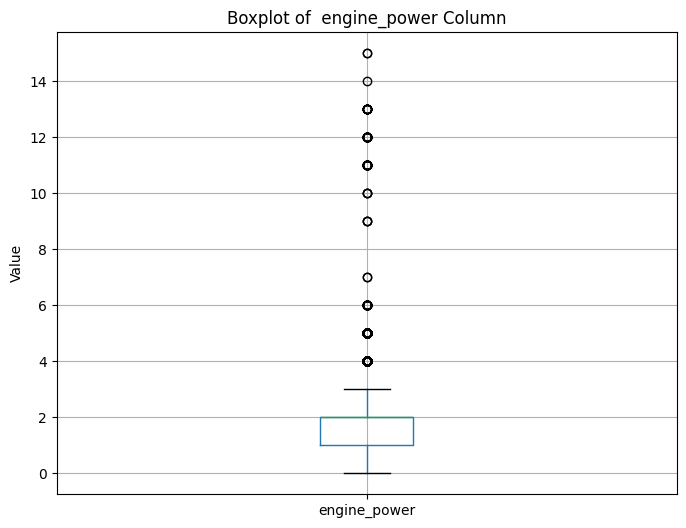

In [201]:
plt.figure(figsize=(8, 6))
X_train.boxplot(column='engine_power')
plt.title('Boxplot of  engine_power Column')
plt.ylabel('Value')
plt.show()

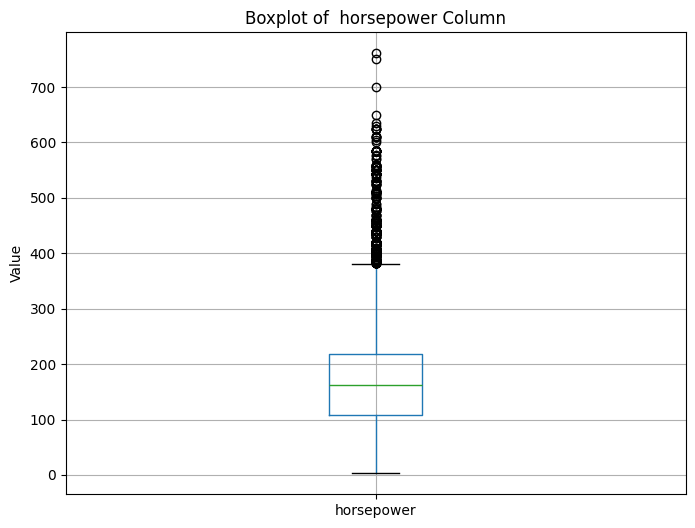

In [202]:
plt.figure(figsize=(8, 6))
X_train.boxplot(column='horsepower')
plt.title('Boxplot of  horsepower Column')
plt.ylabel('Value')
plt.show()

In [203]:
from sklearn.preprocessing import StandardScaler,RobustScaler
outlier_columns = ["price",'release_date',"distance","views","seats","engine_power","horsepower"]
RobustScaler = RobustScaler()
X_train[outlier_columns]=RobustScaler.fit_transform(X_train[outlier_columns])
X_test[outlier_columns]=RobustScaler.transform(X_test[outlier_columns])

In [204]:
standart_columns = ["day","month","year"]
StandardScaler = StandardScaler()
X_train[standart_columns]=StandardScaler.fit_transform(X_train[standart_columns])
X_test[standart_columns]=StandardScaler.transform(X_test[standart_columns])
    

### Removing categorical columns

In [205]:
X_train.drop(columns={"city",'brand','model','type_of_ban','color','gearbox','gear','fuel','market'},inplace=True)
X_test.drop(columns={"city",'brand','model','type_of_ban','color','gearbox','gear','fuel','market'},inplace=True)

# Find optimal threshold and AUC score

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [207]:
columns_to_keep = ["views","price","distance","release_date",'horsepower','model_Kfold_Target_Enc','color_Kfold_Target_Enc']

X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]



In [268]:
log_classifier = LogisticRegression()
param_grid_log = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'],  
    'max_iter': [100, 200, 300]  
}
grid_search_log = GridSearchCV(estimator=log_classifier, param_grid=param_grid_log, cv=5, scoring='roc_auc')
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [269]:
best_classifier_log = grid_search_log.best_estimator_
ytrain_pred_log = best_classifier_log.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_log[:, 1])))
ytest_pred_log = best_classifier_log.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_log[:, 1])))

Logistic train roc-auc: 0.5084356896089224
Logistic test roc-auc: 0.4982819931279725


In [254]:
rand_forest = RandomForestClassifier()
param_grid_rand = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [ 'sqrt', 'log2']
}
grid_search_rand = GridSearchCV(estimator=rand_forest, param_grid=param_grid_rand, cv=5, scoring='roc_auc')
grid_search_rand.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [257]:
best_classifier_rand = grid_search_rand.best_estimator_
ytrain_pred_rand = best_classifier_rand.predict_proba(X_train)
print('RandomForest train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_rand[:, 1])))
ytest_pred_rand = best_classifier_rand.predict_proba(X_test)
print('RandomForest test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_rand[:, 1])))

RandomForest train roc-auc: 0.9999991249997813
RandomForest test roc-auc: 0.4803179212716851


In [259]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [260]:
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'algorithm': [ 'ball_tree', 'kd_tree', 'brute'], 
    'p': [1, 2] 
}
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='roc_auc')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [265]:
best_classifier_knn = grid_search_knn.best_estimator_
ytrain_pred_knn = best_classifier_knn.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_knn[:, 1])))
ytest_pred_knn = best_classifier_knn.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_knn[:, 1])))

KNN train roc-auc: 0.715582303895576
KNN test roc-auc: 0.5034235136940548


In [264]:
dec_tree  = DecisionTreeClassifier()
param_grid_dec = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None],  
}
grid_search_dec = GridSearchCV(estimator=dec_tree, param_grid=param_grid_dec, cv=5, scoring='roc_auc')
grid_search_dec.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [266]:
best_classifier_dec = grid_search_dec.best_estimator_
ytrain_pred_dec = best_classifier_dec.predict_proba(X_train)
print('Decision tree train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_dec[:, 1])))
ytest_pred_dec = best_classifier_dec.predict_proba(X_test)
print('Decision tree test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_dec[:, 1])))

Decision tree train roc-auc: 0.770596036399009
Decision tree test roc-auc: 0.4890354561418246


In [270]:
pred=[]
for model in [best_classifier_log,best_classifier_rand,best_classifier_knn,best_classifier_dec]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.4882239528958116


In [271]:
pd.concat(pred,axis=1)


,0,1,2,3
0,0.500331,0.695139,0.428571,1.000000
1,0.499818,0.567452,0.714286,0.508714
2,0.500189,0.456262,0.571429,0.500000
3,0.500318,0.571933,0.714286,0.816327
4,0.499254,0.571155,0.571429,0.508714
5,0.500237,0.519095,0.571429,1.000000
6,0.499630,0.466262,0.428571,0.558140
7,0.500136,0.434369,0.714286,0.461224
8,0.500357,0.621024,0.857143,0.578652
9,0.499988,0.621040,0.428571,0.625000


In [272]:
final_prediction

0       0.656010
1       0.572568
2       0.506970
3       0.650716
4       0.537638
5       0.647690
6       0.488151
7       0.527504
8       0.639294
9       0.543650
10      0.443841
11      0.440162
12      0.594033
13      0.511490
14      0.376824
15      0.619540
16      0.355247
17      0.366490
18      0.597968
19      0.532388
20      0.449927
21      0.637345
22      0.701336
23      0.359152
24      0.481825
25      0.569158
26      0.434773
27      0.558621
28      0.633610
29      0.472421
30      0.502394
31      0.364165
32      0.509150
33      0.377903
34      0.295029
35      0.662567
36      0.551497
37      0.368698
38      0.500735
39      0.448507
40      0.641691
41      0.397948
42      0.517037
43      0.531866
44      0.378411
45      0.476489
46      0.481418
47      0.573064
48      0.523725
49      0.446219
50      0.585866
51      0.518715
52      0.523116
53      0.469328
54      0.613646
55      0.472513
56      0.490566
57      0.430172
58      0.4610

In [273]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([       inf, 0.78587976, 0.75384656, 0.75343613, 0.73986406,
       0.73952406, 0.73184103, 0.7308411 , 0.73020009, 0.7268567 ,
       0.72632387, 0.72604327, 0.72097289, 0.71968661, 0.7185228 ,
       0.7139219 , 0.7126002 , 0.70368517, 0.70200135, 0.70133612,
       0.70128277, 0.70097128, 0.70089231, 0.69889556, 0.69754899,
       0.69406302, 0.69223086, 0.69222317, 0.69214977, 0.69171211,
       0.69064157, 0.68622149, 0.68262316, 0.68182136, 0.68163299,
       0.68121694, 0.6804211 , 0.67924451, 0.67686941, 0.67666705,
       0.67597211, 0.67558265, 0.6738224 , 0.67303505, 0.67266111,
       0.67245164, 0.6717558 , 0.66909399, 0.66891858, 0.66804219,
       0.6667633 , 0.66597084, 0.66378956, 0.66253488, 0.66165698,
       0.66084122, 0.65848278, 0.6584725 , 0.65830955, 0.65817302,
       0.65727732, 0.65723072, 0.65631413, 0.65581231, 0.65334524,
       0.65264806, 0.6518383 , 0.65107026, 0.65072147, 0.65028108,
       0.64947063, 0.64914814, 0.64769009, 0.64641223, 0.64636

In [274]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
449,0.513867,0.5145
454,0.513051,0.5145
452,0.513276,0.5145
451,0.513557,0.5145
450,0.513783,0.5145


In [275]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

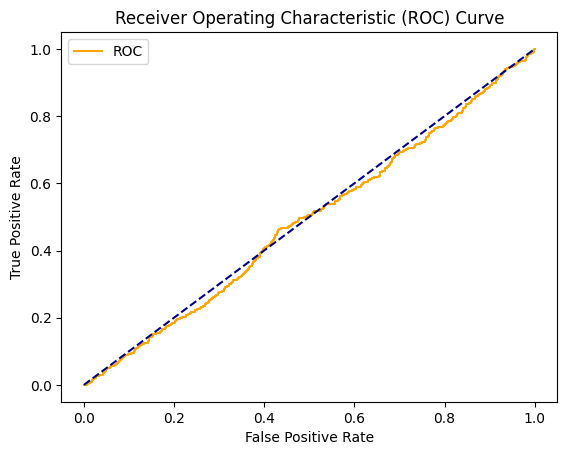

In [276]:
plot_roc_curve(fpr,tpr)

In [280]:
accuracy = accuracy_score(y_test, np.where(final_prediction>0.513867,1,0))
report = classification_report(y_test, np.where(final_prediction>0.513867,1,0))
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5145
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.57      0.54       998
           1       0.52      0.46      0.49      1002

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [282]:
from sklearn.metrics import confusion_matrix

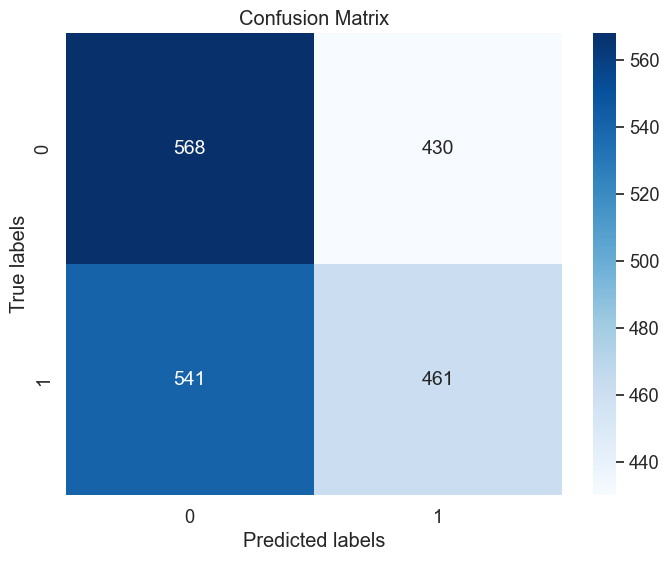

In [285]:
cm = confusion_matrix(y_test, np.where(final_prediction>0.513867,1,0))
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['0', '1'])
plt.yticks(np.arange(2) + 0.5, ['0', '1'])
plt.show()